# Fourier transforms 

## From very naive approximations of the spectrum to more complex examples:


In [11]:
from __future__ import division

from scipy import fft
import numpy as np

# redefine default figure size and fonts
import matplotlib as mpl
mpl.rc('font', size=14)
mpl.rc('figure',figsize=(12,10))

import matplotlib.pyplot as plt

%matplotlib inline

## Two basic ploting functions that repeat the actuall spectral analysis:

In [12]:
from scipy import fft

def spectrum(y,Fs):
    """
    Plots a Single-Sided Amplitude Spectrum of a sampled
    signal y(t), sampling frequency Fs (lenght of a signal 
    provides the number of samples recorded)
    
    Following: http://goo.gl/wRoUn
    """
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(np.int(n/2))] # one side frequency range
    Y = 2*fft.fft(y)/n # fft computing and normalization
    Y = Y[range(np.int(n/2))]
    return (frq, Y)


def plotSignal(A,ff,fs,N):

    T = N/fs # sampling period
    t = np.arange(0.0,T,T/N) # sampling time steps
    y = A*np.sin(2*np.pi*ff*t) # sampled signal
    frq,Y = spectrum(y,fs) # FFT(sampled signal)
    
    # Plot
    plt.figure(figsize=(8,6))
    plt.subplot(2,1,1)
    plt.plot(t,y,'b:.')
    plt.xlabel('$t$ [s]')
    plt.ylabel('Y [V]')
    # axes().set_aspect(0.2)
    # title('sampled signal')
    plt.subplot(2,1,2)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('$f$ (Hz)')
    plt.ylabel('$|Y(f)|$')
    lgnd = str(r'N = %d, f = %d' % (N,fs))
    plt.legend([lgnd],loc='best')

## More elaborate example, demonstration of a leakage effect:

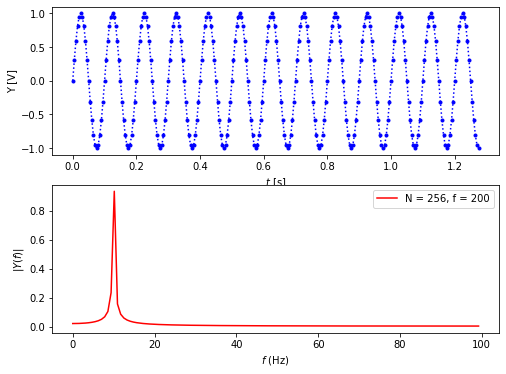

In [13]:
# We sample a signal at fs = 200 Hz and record 256 points"

A = 1.0 # Volt, amplitude
ff = 10.0 # Hz, signal frequency, zero harmonics


# We will work with different sampling frequencies
# and different lengths of records:

fs = 200.0 #Hz
N = 256 # points

plotSignal(A,ff,fs,N)

### Note:
1. leakage at around 10 Hz
2. peak is below 1 Volt
3. we can get the spectrum up to half of sampling frequency
4. frequency resolution is $\Delta f = 1/T = 0.781$ Hz

### Let us try to minimize the leakage:
#### Let's first increase the sampling rate, stay with N = 256

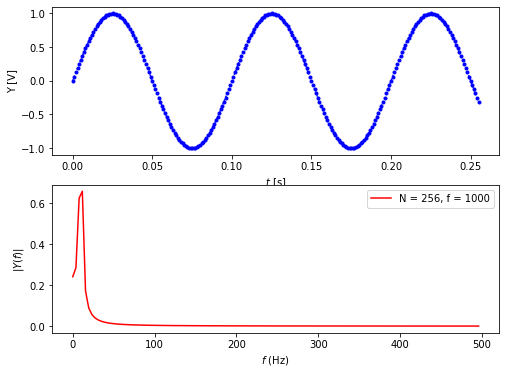

In [14]:
fs = 1000.0 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)

### Note:
1. resolution in time is great BUT:
1. resolution in frequency is worse, $\Delta f = 1/T = 1/0.25 = 3.91$ Hz
2. we see up to 500 Hz, but have here only 128 useful points
3. leakage is severe, the peak amplitude is about 0.66 Volt
4. peak location is now 11.7 Hz


<span style="color:red"> **MORE IS NOT NECESSARILY BETTER** </span>

###Let us try to minimize the leakage problem sampling closer to the Nyquist frequency

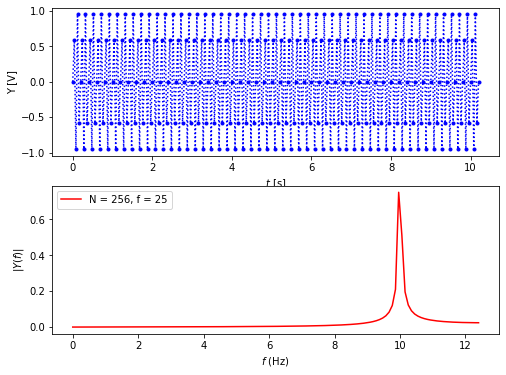

In [15]:
fs = 25.0 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)

### Note:
1. sine does not seem to be a sine wave, time resolution is bad for Nyquist frequency
2. frequency resolution is better, about 0.1 Hz
3. peak is about 0.75 Volt, less leakage but still strong
4. peak location is close, 9.96 Hz

### Let's get more points, keep same sampling frequency

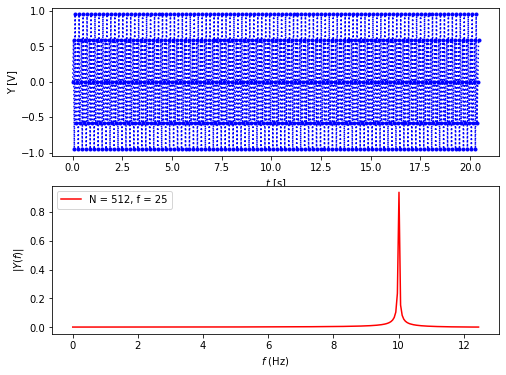

In [16]:
fs = 25.0 #Hz
N = 512 # points
plotSignal(A,ff,fs,N)

### Note: 
1. time sampling is much longer, $T = N/f_s = 512/(25 Hz) = 20.48$ s
2. peak is narrow, at 10.01 Hz
3. resolution is good, much lower leakage, value is close to 0.9 Volt

### Still, how to get the *perfect* spectrum? Use tricks, for instance, sample at a specific frequency: 

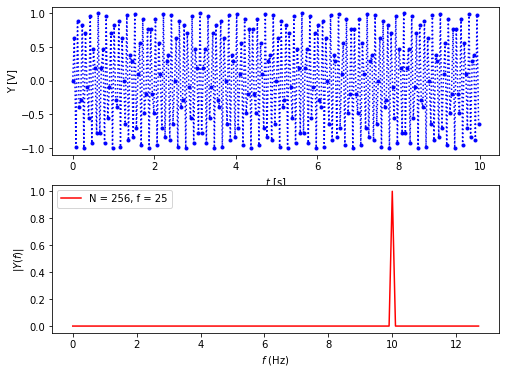

In [17]:
fs = 25.6 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)

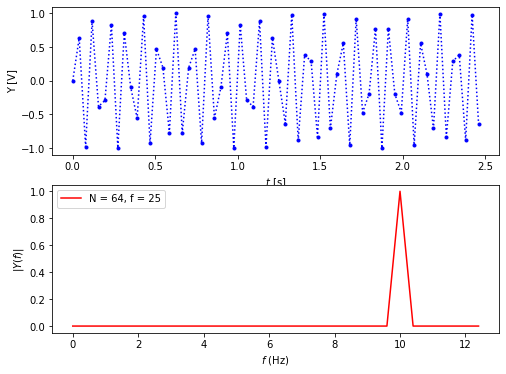

In [18]:
# After you know the real value, you can save a lot of time:
fs = 25.6 #Hz
N = 64 # points
plotSignal(A,ff,fs,N)